In [125]:
import librosa
import numpy as np
import os
import pickle

g=os.listdir("wav_files")
mfccs_size=0

spectrals=[]
for vidfile in g:

    dr=librosa.get_duration(path=f"wav_files/{vidfile}")
    y,sr = librosa.load(f"wav_files/{vidfile}",sr=1000000/dr)



    #1mk  points of sampled time serie data
    #print(f"Sampling data: {y.shape}")
    print(f"Sample rate: {sr}")
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    #print(mfccs.shape)g=os.listdir("wav_files")

    mfccs_mean = np.mean(mfccs, axis=0)[::2]
    mfccs_max = np.max(mfccs, axis=0)[::2]
    mfccs_size=len(mfccs_mean)

    #print(mfccs_max.shape)
    #print(mfccs_mean.shape)


    zero_crossings = librosa.zero_crossings(y, pad=False)
    #print(np.array((sum(zero_crossings))))
    song_characteristics=np.concatenate((mfccs_mean,mfccs_max))
    song_characteristics=np.concatenate((song_characteristics,[sum(zero_crossings)]))
    spectrals.append(song_characteristics)
    #https://towardsdatascience.com/extract-features-of-music-75a3f9bc265dnp.array(sum(zero_crossings))
spectrals=np.array(spectrals)
print(spectrals.shape)


Sample rate: 4364.248707944872
Sample rate: 3682.7780271934325
Sample rate: 4403.159251786425
Sample rate: 4749.272855094839
Sample rate: 4325.673588790679
Sample rate: 5103.38225791221
Sample rate: 3142.157175689479
Sample rate: 4258.940491495253
Sample rate: 3567.462413021869
Sample rate: 3911.288777634453
Sample rate: 3360.887018105197
Sample rate: 4815.764782759868
Sample rate: 3761.915290880503
Sample rate: 3893.6079142127815
Sample rate: 4254.732883817427
Sample rate: 3824.725244227353
Sample rate: 4041.5171030405404
Sample rate: 2055.479488831615
Sample rate: 4118.82232689365
Sample rate: 4085.6879001380053
Sample rate: 3395.6552860111938
Sample rate: 4886.80345874873
Sample rate: 4235.9857071502665
Sample rate: 3444.21035268714
Sample rate: 3474.778622720671
Sample rate: 3506.4652540302877
Sample rate: 5149.761125819525
Sample rate: 5429.4511157337365
Sample rate: 3617.8096648185488
Sample rate: 8319.12228543833
Sample rate: 5013.086315115558
Sample rate: 5495.409277148069
Samp

In [126]:
import sklearn
#Mean, max, zero
spectrals_n=sklearn.preprocessing.normalize(spectrals,axis=0)

print(spectrals_n.shape)

print(mfccs_size)


(33, 1955)
977


### Spectral array:
- First n columns [0,mfccs_size] are the MCCF mean
- Second n columns, [mfccs_size,mfccs_size*2[ are the MCCF max.
- Last column, 2*mfccs_size+1, is the zero crossings

In [127]:
from sklearn.decomposition import PCA



#For means
spectral_n_means=spectrals_n[:,:mfccs_size]
print(spectral_n_means.shape)
pca = PCA(n_components=6)
 
pca_means=pca.fit_transform(spectral_n_means)
#print(pca.components_)
#print(pca.explained_variance_)

print(pca_means.shape)

#retain 5

(33, 977)
(33, 6)


In [134]:
#For maxes
spectral_n_maxes=spectrals_n[:,mfccs_size:mfccs_size*2]
print(spectral_n_maxes.shape)
pca = PCA(n_components=12)
 
pca_maxes=pca.fit_transform(spectral_n_maxes)
#print(pca.components_)
print(pca.explained_variance_)
print(pca_maxes.shape)

#retain 5

(33, 977)
[1.15225409 0.32494492 0.24462133 0.22488691 0.19015934 0.15260946
 0.14185443 0.1352769  0.12275459 0.11865732 0.10771175 0.10374525]
(33, 12)


In [135]:
reduced_spectral=np.concatenate((pca_maxes,pca_means),axis=1)
print(spectrals_n[:,mfccs_size*2:].shape)
reduced_spectral=np.concatenate((reduced_spectral,spectrals_n[:,2*mfccs_size:]),axis=1)
print(reduced_spectral.shape)

(33, 1)
(33, 19)


In [136]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(reduced_spectral)
	kmeanModel.fit(reduced_spectral)

	distortions.append(sum(np.min(cdist(reduced_spectral, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / reduced_spectral.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(reduced_spectral, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / reduced_spectral.shape[0]
	mapping2[k] = kmeanModel.inertia_


/home/hakosaj/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hakosaj/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hakosaj/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hakosaj/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

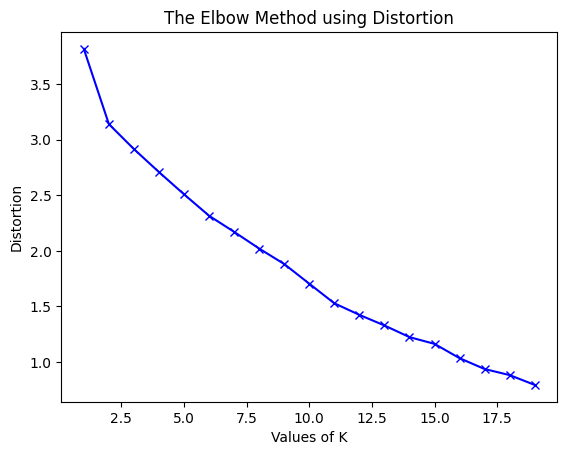

In [137]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [138]:

kmeanModel = KMeans(n_clusters=8).fit(reduced_spectral)
kmeanModel.fit(reduced_spectral)
print(kmeanModel.labels_)

/home/hakosaj/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 1 2 1 2 2 2 1 1 6 2 1 3 1 2 7 5 4 7 2 4 0 7 7 2 7 7 1 7 3 4 7]


/home/hakosaj/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
for c, value in enumerate(g):
    print(f"{value.replace('.wav',''):50}   |  {kmeanModel.labels_[c]} ")

letsgetitstarted                                     |  2 
youdontknowme                                        |  1 
neverbethesame                                       |  1 
righthereinmyarms                                    |  2 
legendary                                            |  1 
heathens                                             |  2 
soundgardenblackholesunwithlyrics                    |  2 
virtualinsanity                                      |  2 
justintimberlake-mylove                              |  1 
latch                                                |  1 
sweetdreams                                          |  6 
kohtalo                                              |  2 
doiwannaknow?                                        |  1 
bettergiveuup                                        |  3 
3doorsdown-kryptonite                                |  1 
disturbia                                            |  2 
redhotchilipeppers-ifyouwantmetostay                 |  